In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

In [2]:
# Spécifiez le chemin du dossier contenant les fichiers CSV
dossier_csv = r"C:\Users\lcatteau\Desktop\projet 7/"

# Liste tous les fichiers dans le dossier
fichiers_csv = [fichier for fichier in os.listdir(dossier_csv) if fichier.endswith('.csv')]

# Boucle à travers chaque fichier CSV et le charge dans un DataFrame pandas
for fichier_csv in fichiers_csv:
    chemin_fichier = os.path.join(dossier_csv, fichier_csv)
    df = pd.read_csv(chemin_fichier)

    # Faites quelque chose avec le DataFrame, par exemple imprimez les premières lignes
    print(f"{fichier_csv}:")

application_test.csv:
application_train.csv:
bureau.csv:
bureau_balance.csv:
credit_card_balance.csv:
installments_payments.csv:
POS_CASH_balance.csv:
previous_application.csv:
sample_submission.csv:


In [3]:
# Liste pour stocker les DataFrames
dfs = []

# Boucle à travers chaque fichier CSV et le charge dans un DataFrame pandas
for fichier_csv in fichiers_csv:
    chemin_fichier = os.path.join(dossier_csv, fichier_csv)
    df = pd.read_csv(chemin_fichier)
    dfs.append(df)

In [4]:
dfs[1]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## train

In [5]:
# on cherche les variables catégorielles
df_train = dfs[1]
var_num_train = []
var_cat = []
for variable in df_train.columns :
    if type(df_train.iloc[71,:][variable]) == str : #variable sans nulls
        var_cat = var_cat + [variable]
    else :
        var_num_train = var_num_train +[variable]

In [6]:
df_train[var_cat] = df_train[var_cat].apply(lambda col: col.fillna(col.mode().iloc[0]))
df_train[var_cat].isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64

In [7]:
ma_liste = var_num_train
elements_a_enlever = ['SK_ID_CURR', 'TARGET']

nouvelle_liste = [x for x in ma_liste if x not in elements_a_enlever]
df_train[nouvelle_liste] = df_train[nouvelle_liste].apply(lambda col: col.fillna(col.median()))
df_train[nouvelle_liste].isnull().sum()

CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 104, dtype: int64

In [8]:
df_train[var_num_train].drop(columns=['SK_ID_CURR','TARGET'])

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
tmp = df_train[var_num_train].drop(columns=['SK_ID_CURR','TARGET'])

In [10]:
# encodage des variables catégorielles
for i in range(len(var_cat)) :
    le = LabelEncoder()
    df_train[f'{var_cat[i]}_enc'] = le.fit_transform(df_train[var_cat[i]].to_numpy())
    
#création d'un df sans les var_cat
df_train_enc = df_train.drop(columns=var_cat)

In [11]:
tmp

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
tmp2 = pd.concat([df_train_enc[['SK_ID_CURR', 'TARGET']], tmp], axis=1)
tmp3 = pd.concat([tmp2, df_train_enc.filter(like='_enc', axis=1)], axis=1)
df_train_ok = tmp3

## bureau

In [13]:
var_cat = ["CREDIT_ACTIVE","CREDIT_CURRENCY","CREDIT_TYPE"]
list_var = []
# encodage des variables catégorielles
for i in range(len(var_cat)) :
    le = LabelEncoder()
    list_var = list_var + [le.fit_transform(dfs[2][var_cat[i]].to_numpy())]
    
#création d'un df sans les var_cat
for i in range(len(var_cat)) :
    dfs[2][var_cat[i]]=list_var[i]

In [14]:
var_num_bureau = list(dfs[2].columns)
var_num_bureau.remove(var_cat[0])
var_num_bureau.remove(var_cat[1])
var_num_bureau.remove(var_cat[2])
var_num_bureau.remove("SK_ID_CURR")
var_num_bureau.remove("SK_ID_BUREAU")
var_num_bureau

['DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'DAYS_CREDIT_UPDATE',
 'AMT_ANNUITY']

In [15]:
dfs[2].head(5).T

,0,1,2,3,4
SK_ID_CURR,215354.0,215354.0,215354.0,215354.0,215354.0
SK_ID_BUREAU,5714462.0,5714463.0,5714464.0,5714465.0,5714466.0
CREDIT_ACTIVE,2.0,0.0,0.0,0.0,0.0
CREDIT_CURRENCY,0.0,0.0,0.0,0.0,0.0
DAYS_CREDIT,-497.0,-208.0,-203.0,-203.0,-629.0
CREDIT_DAY_OVERDUE,0.0,0.0,0.0,0.0,0.0
DAYS_CREDIT_ENDDATE,-153.0,1075.0,528.0,NaN,1197.0
DAYS_ENDDATE_FACT,-153.0,NaN,NaN,NaN,NaN
AMT_CREDIT_MAX_OVERDUE,NaN,NaN,NaN,NaN,77674.5
CNT_CREDIT_PROLONG,0.0,0.0,0.0,0.0,0.0


In [16]:
grouped_df = dfs[2].groupby(['SK_ID_CURR'])
resultats_agregats = grouped_df.agg({
    'SK_ID_BUREAU' : 'count',
    'DAYS_CREDIT' : np.median,
    'CREDIT_DAY_OVERDUE' : np.median,
    'DAYS_CREDIT_ENDDATE' : np.median,
    'DAYS_ENDDATE_FACT' : np.median,
    'AMT_CREDIT_MAX_OVERDUE' : np.median,
    'CNT_CREDIT_PROLONG' : 'sum',
    'AMT_CREDIT_SUM' : np.median,
    'AMT_CREDIT_SUM_DEBT' : np.median,
    'AMT_CREDIT_SUM_LIMIT' : np.median,
    'AMT_CREDIT_SUM_OVERDUE' : np.median,
    'CREDIT_TYPE' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'DAYS_CREDIT_UPDATE' : np.median,
    'AMT_ANNUITY' : np.median,
    'CREDIT_ACTIVE' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'CREDIT_CURRENCY' : lambda x: x.mode().iloc[0] if not x.empty else None
    })

In [17]:
df_bureau = resultats_agregats.reset_index()

In [18]:
df_bureau_rempli = df_bureau.fillna(0)

In [19]:
df_bureau_rempli.shape

(305811, 17)

In [20]:
df_bureau_rempli.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY               0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
dtype: int64

##  installments_payments

In [21]:
dfs[5].loc[dfs[5]['SK_ID_CURR']==145728]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
77,2436675,145728,1.0,15,-380.0,-378.0,13000.500,12382.560
5261,2662891,145728,1.0,14,-263.0,-286.0,12428.820,110.340
7904,1645263,145728,0.0,86,-1044.0,-1044.0,3375.000,3375.000
16791,1513605,145728,1.0,1,-2881.0,-2881.0,5952.915,5952.915
19856,1645263,145728,0.0,101,-794.0,-823.0,193.095,193.095
...,...,...,...,...,...,...,...,...
3757425,1645263,145728,0.0,96,-915.0,-915.0,1301.310,1301.310
3770729,2662891,145728,1.0,15,-233.0,-258.0,12428.820,114.570
3772076,1365478,145728,4.0,13,-683.0,-683.0,1300.410,1300.410
3774958,2436675,145728,1.0,6,-650.0,-657.0,13000.500,13000.500


In [22]:
mediane_entry = dfs[5]['DAYS_ENTRY_PAYMENT'].median()
dfs[5].loc[dfs[5]['DAYS_ENTRY_PAYMENT'].isnull(),'DAYS_ENTRY_PAYMENT'] = mediane_entry

mediane_atm = dfs[5]['AMT_PAYMENT'].median()
dfs[5].loc[dfs[5]['AMT_PAYMENT'].isnull(),'AMT_PAYMENT'] = mediane_atm

In [23]:
dfs[5]['DIFF_DAYS'] = dfs[5]['DAYS_INSTALMENT'] - dfs[5]['DAYS_ENTRY_PAYMENT']
dfs[5]['DIFF_ATM'] = dfs[5]['AMT_INSTALMENT'] - dfs[5]['AMT_PAYMENT']

In [24]:
grouped_df = dfs[5].groupby(['SK_ID_CURR'])
resultats_agregats = grouped_df.agg({
    'SK_ID_PREV': 'count',
    'NUM_INSTALMENT_VERSION': lambda x: x.mode().iloc[0] if not x.empty else None,
    'NUM_INSTALMENT_NUMBER': np.median,
    'DAYS_INSTALMENT': np.max,
    'DAYS_ENTRY_PAYMENT': np.median,
    'AMT_INSTALMENT': np.median,
    'AMT_PAYMENT': np.median,
    'DIFF_DAYS': np.median,
    'DIFF_ATM': np.median
    })

In [25]:
df_installments_payments = resultats_agregats.reset_index()

In [26]:
df_installments_payments.isnull().sum()

SK_ID_CURR                0
SK_ID_PREV                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
DIFF_DAYS                 0
DIFF_ATM                  0
dtype: int64

In [27]:
df_installments_payments.columns

Index(['SK_ID_CURR', 'SK_ID_PREV', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'DIFF_DAYS', 'DIFF_ATM'],
      dtype='object')

In [28]:
var_num_installments = ['DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'DIFF_DAYS', 'DIFF_ATM']

## POS_CASH_balance

In [29]:
dfs[6].head(5).T

,0,1,2,3,4
SK_ID_PREV,1803195,1715348,1784872,1903291,2341044
SK_ID_CURR,182943,367990,397406,269225,334279
MONTHS_BALANCE,-31,-33,-32,-35,-35
CNT_INSTALMENT,48.0,36.0,12.0,48.0,36.0
CNT_INSTALMENT_FUTURE,45.0,35.0,9.0,42.0,35.0
NAME_CONTRACT_STATUS,Active,Active,Active,Active,Active
SK_DPD,0,0,0,0,0
SK_DPD_DEF,0,0,0,0,0


In [30]:
le = LabelEncoder()
encod = le.fit_transform(np.array(dfs[6]["NAME_CONTRACT_STATUS"]))
tmp = dfs[6]
tmp["NAME_CONTRACT_STATUS"]=encod

In [31]:
grouped_df = tmp.groupby(['SK_ID_CURR'])
resultats_agregats = grouped_df.agg({
    'SK_ID_PREV': 'count',
    'MONTHS_BALANCE': 'max',
    'CNT_INSTALMENT': np.mean,
    'CNT_INSTALMENT_FUTURE': np.mean,
    'SK_DPD': np.median,
    'SK_DPD_DEF': np.median,
    'NAME_CONTRACT_STATUS': lambda x: x.mode().iloc[0] if not x.empty else None
    })

In [32]:
df_POS_CASH_balance = resultats_agregats.reset_index()
df_POS_CASH_balance.isnull().sum()

SK_ID_CURR                0
SK_ID_PREV                0
MONTHS_BALANCE            0
CNT_INSTALMENT           28
CNT_INSTALMENT_FUTURE    28
SK_DPD                    0
SK_DPD_DEF                0
NAME_CONTRACT_STATUS      0
dtype: int64

In [33]:
# Implementation des valeurs médiannes pour les valeurs nulles
median_inst = df_POS_CASH_balance["CNT_INSTALMENT"].median()
median_inst_fut = df_POS_CASH_balance["CNT_INSTALMENT_FUTURE"].median()

df_POS_CASH_balance.loc[df_POS_CASH_balance["CNT_INSTALMENT"].isnull(),"CNT_INSTALMENT"] = median_inst
df_POS_CASH_balance.loc[df_POS_CASH_balance["CNT_INSTALMENT_FUTURE"].isnull(),"CNT_INSTALMENT_FUTURE"] = median_inst_fut

In [34]:
var_num_pos = ['MONTHS_BALANCE', 'CNT_INSTALMENT','CNT_INSTALMENT_FUTURE']

## previous_application

In [35]:
# on cherche les variables catégorielles
df_appl = dfs[7]
var_num_application = []
var_cat = []
for variable in df_appl.columns :
    if type(df_appl.iloc[598,:][variable]) == str : #variable sans nulls
        var_cat = var_cat + [variable]
    else :
        var_num_application = var_num_application +[variable]

In [36]:
list_var = []
# encodage des variables catégorielles
for i in range(len(var_cat)) :
    le = LabelEncoder()
    list_var = list_var + [le.fit_transform(df_appl[var_cat[i]].to_numpy())]
    
#création d'un df sans les var_cat
for i in range(len(var_cat)) :
    df_appl[var_cat[i]]=list_var[i]

In [37]:
df_appl.head(5).T

,0,1,2,3,4
SK_ID_PREV,2.030495e+06,2802425.000,2523466.000,2819243.000,1784265.000
SK_ID_CURR,2.718770e+05,108129.000,122040.000,176158.000,202054.000
NAME_CONTRACT_TYPE,1.000000e+00,0.000,0.000,0.000,0.000
AMT_ANNUITY,1.730430e+03,25188.615,15060.735,47041.335,31924.395
AMT_APPLICATION,1.714500e+04,607500.000,112500.000,450000.000,337500.000
AMT_CREDIT,1.714500e+04,679671.000,136444.500,470790.000,404055.000
AMT_DOWN_PAYMENT,0.000000e+00,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,1.714500e+04,607500.000,112500.000,450000.000,337500.000
WEEKDAY_APPR_PROCESS_START,2.000000e+00,4.000,5.000,1.000,4.000
HOUR_APPR_PROCESS_START,1.500000e+01,11.000,11.000,7.000,9.000


In [38]:
grouped_df = df_appl.groupby(['SK_ID_CURR'])
resultats_agregats = grouped_df.agg({
    'SK_ID_PREV' : 'count',
    'NAME_CONTRACT_TYPE' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'AMT_ANNUITY' : np.mean,
    'AMT_APPLICATION' : np.mean,
    'AMT_CREDIT' : np.mean,
    'AMT_DOWN_PAYMENT' : np.mean,
    'AMT_GOODS_PRICE' : np.mean,
    'WEEKDAY_APPR_PROCESS_START' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'HOUR_APPR_PROCESS_START' : np.mean,
    'FLAG_LAST_APPL_PER_CONTRACT' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'NFLAG_LAST_APPL_IN_DAY' : np.median,
    'RATE_DOWN_PAYMENT' : np.mean,
    'RATE_INTEREST_PRIMARY' : np.mean,
    'RATE_INTEREST_PRIVILEGED' : np.mean,
    'NAME_CASH_LOAN_PURPOSE' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'NAME_CONTRACT_STATUS' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'DAYS_DECISION' : 'max',
    'NAME_PAYMENT_TYPE' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'CODE_REJECT_REASON' : lambda x: x.mode().iloc[0] if not x.empty else None,
    #'NAME_TYPE_SUITE' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'NAME_CLIENT_TYPE' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'NAME_GOODS_CATEGORY' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'NAME_PORTFOLIO' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'NAME_PRODUCT_TYPE' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'CHANNEL_TYPE' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'SELLERPLACE_AREA' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'NAME_SELLER_INDUSTRY' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'CNT_PAYMENT' : np.mean,
    'NAME_YIELD_GROUP' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'PRODUCT_COMBINATION' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'DAYS_FIRST_DRAWING' : 'max',
    'DAYS_FIRST_DUE' : 'max',
    'DAYS_LAST_DUE_1ST_VERSION' : 'min',
    'DAYS_LAST_DUE' : 'min',
    'DAYS_TERMINATION' : 'max',
    'NFLAG_INSURED_ON_APPROVAL' : np.median
    })

In [39]:
df_previous_application = resultats_agregats.reset_index()

In [40]:
# Suppression des colonnes avec un écart-type inférieur à 0.1
list_suppr = list(df_previous_application.std()[df_previous_application.std() < 0.1].index)
df_previous_application = df_previous_application.drop(columns=list_suppr)

In [41]:
# Implémentation des nulls par la médiane de la colonne
colonnes_avec_nuls = df_previous_application.columns[df_previous_application.isnull().any()]
for colonne in colonnes_avec_nuls :
    median = df_previous_application[colonne].median()
    df_previous_application.loc[df_previous_application[colonne].isnull(),colonne] = median

## credit_card_balance

In [42]:
le = LabelEncoder()
encod = le.fit_transform(dfs[4]['NAME_CONTRACT_STATUS'].to_numpy())

In [43]:
dfs[4]['NAME_CONTRACT_STATUS'] = encod

In [44]:
dfs[4].head(5).T

,0,1,2,3,4
SK_ID_PREV,2562384.000,2582071.000,1740877.000,1389973.000,1891521.000
SK_ID_CURR,378907.000,363914.000,371185.000,337855.000,126868.000
MONTHS_BALANCE,-6.000,-1.000,-7.000,-4.000,-1.000
AMT_BALANCE,56.970,63975.555,31815.225,236572.110,453919.455
AMT_CREDIT_LIMIT_ACTUAL,135000.000,45000.000,450000.000,225000.000,450000.000
AMT_DRAWINGS_ATM_CURRENT,0.000,2250.000,0.000,2250.000,0.000
AMT_DRAWINGS_CURRENT,877.500,2250.000,0.000,2250.000,11547.000
AMT_DRAWINGS_OTHER_CURRENT,0.000,0.000,0.000,0.000,0.000
AMT_DRAWINGS_POS_CURRENT,877.500,0.000,0.000,0.000,11547.000
AMT_INST_MIN_REGULARITY,1700.325,2250.000,2250.000,11795.760,22924.890


In [45]:
grouped_df = dfs[4].groupby(['SK_ID_CURR'])
resultats_agregats = grouped_df.agg({
    'SK_ID_PREV' : 'count',
    'MONTHS_BALANCE' : 'max',
    'AMT_BALANCE' : np.median,
    'AMT_CREDIT_LIMIT_ACTUAL' : np.median,
    'AMT_DRAWINGS_ATM_CURRENT' : np.median,
    'AMT_DRAWINGS_CURRENT' : np.median,
    'AMT_DRAWINGS_OTHER_CURRENT' : np.median,
    'AMT_DRAWINGS_POS_CURRENT' : np.median,
    'AMT_INST_MIN_REGULARITY' : np.median,
    'AMT_PAYMENT_CURRENT' : np.median,
    'AMT_PAYMENT_TOTAL_CURRENT' : np.median,
    'AMT_RECEIVABLE_PRINCIPAL' : np.median,
    'AMT_RECIVABLE' : np.median,
    'AMT_TOTAL_RECEIVABLE' : np.median,
    'CNT_DRAWINGS_ATM_CURRENT' : 'sum',
    'CNT_DRAWINGS_CURRENT' : 'sum',
    'CNT_DRAWINGS_OTHER_CURRENT' : 'sum',
    'CNT_DRAWINGS_POS_CURRENT' : 'sum',
    'CNT_INSTALMENT_MATURE_CUM' : 'sum',
    'NAME_CONTRACT_STATUS' : lambda x: x.mode().iloc[0] if not x.empty else None,
    'SK_DPD' : 'count',
    'SK_DPD_DEF' : 'count'
    })

In [46]:
df_credit_card = resultats_agregats.reset_index()

In [47]:
# Implémentation des nulls par la médiane de la colonne
colonnes_avec_nuls = df_credit_card.columns[df_credit_card.isnull().any()]
for colonne in colonnes_avec_nuls :
    median = df_credit_card[colonne].median()
    df_credit_card.loc[df_credit_card[colonne].isnull(),colonne] = median

# Rassemblement dans un dataframe

In [48]:
print(df_credit_card.shape)
print(df_previous_application.shape)
print(df_POS_CASH_balance.shape)
print(df_bureau_rempli.shape)
print(df_installments_payments.shape)
print(df_train_ok.shape)

(103558, 23)
(338857, 32)
(337252, 8)
(305811, 17)
(339587, 10)
(307511, 122)


In [49]:
tmps_1 = pd.merge(df_train_ok, df_installments_payments, on='SK_ID_CURR', how='inner')
tmps_2 = pd.merge(tmps_1, df_bureau_rempli, on='SK_ID_CURR', how='inner')
tmps_3 = pd.merge(tmps_2, df_POS_CASH_balance, on='SK_ID_CURR', how='inner')
tmps_4 = pd.merge(tmps_3, df_previous_application, on='SK_ID_CURR', how='inner')
tmps_5 = pd.merge(tmps_4, df_credit_card, on='SK_ID_CURR', how='inner')

C:\Users\lcatteau\AppData\Local\Temp\ipykernel_33232\3750135779.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'SK_ID_PREV_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmps_5 = pd.merge(tmps_4, df_credit_card, on='SK_ID_CURR', how='inner')


In [50]:
tmps_4

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,24.000000,3,15,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,4,10.000000,4,7,365243.0,-716.0,-1980.0,-1980.0,-527.0,1.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,2,4.000000,4,14,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
3,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,4,20.666667,1,8,365243.0,-344.0,-2056.0,-2056.0,365243.0,1.0
4,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,4,14.000000,3,9,365243.0,-339.0,-2341.0,-2341.0,-66.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247027,456247,0,0,112500.0,345510.0,17770.5,247500.0,0.022800,-11870,-399,...,2,7.750000,3,13,365243.0,-419.0,-2722.0,-2722.0,-321.0,0.0
247028,456249,0,0,112500.0,225000.0,22050.0,225000.0,0.022800,-24384,365243,...,4,12.000000,1,3,365243.0,-1495.0,-1165.0,-1165.0,-1156.0,0.0
247029,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,2,5.000000,1,13,365243.0,-1866.0,-2722.0,-2722.0,-1712.0,0.5
247030,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,2,15.000000,1,9,365243.0,-247.0,99.0,365243.0,365243.0,0.5


In [51]:
ecart_type = tmps_4.std()

# Sélection des colonnes avec un écart type inférieur à 0.05
print("Shape df_train_enc :", tmps_4.shape)
col_suppr = list(ecart_type[ecart_type < 0.05].index)
print("Nombre de colonnes supprimées :",len(col_suppr))

# Dataframe final
df_ok = tmps_4.drop(columns=col_suppr)
print("Shape df_train_ok :",df_ok.shape)

Shape df_train_enc : (247032, 185)
Nombre de colonnes supprimées : 30
Shape df_train_ok : (247032, 155)


In [52]:
col_suppr

['REGION_POPULATION_RELATIVE',
 'FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'CREDIT_CURRENCY',
 'RATE_INTEREST_PRIVILEGED']

In [53]:
var_norm = var_num_train + var_num_bureau + var_num_installments + var_num_pos + var_num_application
var_norm.remove('SK_ID_CURR')
var_norm.remove('TARGET')
var_norm.remove('AMT_CREDIT')
var_norm.remove('AMT_GOODS_PRICE')
var_norm.remove('HOUR_APPR_PROCESS_START')
var_norm.remove('NFLAG_LAST_APPL_IN_DAY')
var_norm.remove('RATE_DOWN_PAYMENT')
var_norm.remove('RATE_INTEREST_PRIMARY')


ValueError: list.remove(x): x not in list

In [55]:
var_norm = [x for x in var_norm if x not in col_suppr]
len(var_norm)

111

In [56]:
var_norm.remove("AMT_CREDIT")
var_norm.remove("AMT_GOODS_PRICE")
var_norm.remove("HOUR_APPR_PROCESS_START")
var_norm.remove("SK_ID_CURR")

In [57]:
X =df_ok[var_norm]
transformer = RobustScaler().fit_transform(X)
df_norm = pd.DataFrame(transformer, columns = X.columns, index=X.index)
df_join = df_ok.drop(columns=var_norm)
test = pd.concat([df_norm,df_join], axis=1)

In [58]:
tmps_4

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,24.000000,3,15,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,4,10.000000,4,7,365243.0,-716.0,-1980.0,-1980.0,-527.0,1.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,2,4.000000,4,14,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
3,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,4,20.666667,1,8,365243.0,-344.0,-2056.0,-2056.0,365243.0,1.0
4,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,4,14.000000,3,9,365243.0,-339.0,-2341.0,-2341.0,-66.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247027,456247,0,0,112500.0,345510.0,17770.5,247500.0,0.022800,-11870,-399,...,2,7.750000,3,13,365243.0,-419.0,-2722.0,-2722.0,-321.0,0.0
247028,456249,0,0,112500.0,225000.0,22050.0,225000.0,0.022800,-24384,365243,...,4,12.000000,1,3,365243.0,-1495.0,-1165.0,-1165.0,-1156.0,0.0
247029,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,2,5.000000,1,13,365243.0,-1866.0,-2722.0,-2722.0,-1712.0,0.5
247030,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,2,15.000000,1,9,365243.0,-247.0,99.0,365243.0,365243.0,0.5


In [59]:
test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,0.0,0.50,-0.265700,0.890042,0.254902,0.158657,0.480080,0.0,0.0,0.0,...,3,7,0,25,3,0,7,0,3,15
1,0.0,1.25,4.229703,-0.134362,0.038824,0.610235,1.208765,0.0,0.0,0.0,...,0,7,1,7,3,0,4,4,4,7
2,0.0,-1.00,-0.635819,-0.454278,0.416471,0.046405,0.316335,17.0,0.0,1.0,...,0,7,0,19,3,0,6,2,4,14
3,0.0,-0.40,0.021976,-0.578541,-0.686667,0.037051,-0.052988,0.0,0.0,0.0,...,0,7,2,27,2,2,4,4,1,8
4,0.0,-0.65,0.360388,-0.159046,-0.118039,-0.083822,1.134661,0.0,0.0,1.0,...,0,7,2,27,3,0,4,4,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247027,0.0,-0.50,-0.150218,0.552174,0.348235,0.703962,-0.243426,0.0,0.0,0.0,...,0,7,2,19,3,0,4,2,3,13
247028,0.0,-0.50,0.483389,-1.202945,143.737255,-0.523844,0.385657,0.0,-1.0,0.0,...,0,1,0,5,2,0,5,4,1,3
247029,0.0,-0.05,-0.691591,0.117952,-2.601569,-0.407924,-0.727092,0.0,0.0,0.0,...,0,7,1,19,3,0,7,2,1,13
247030,0.0,0.15,-0.129860,0.539411,-1.372157,0.357850,0.953785,0.0,0.0,0.0,...,0,7,0,5,3,0,4,2,1,9


<AxesSubplot:>

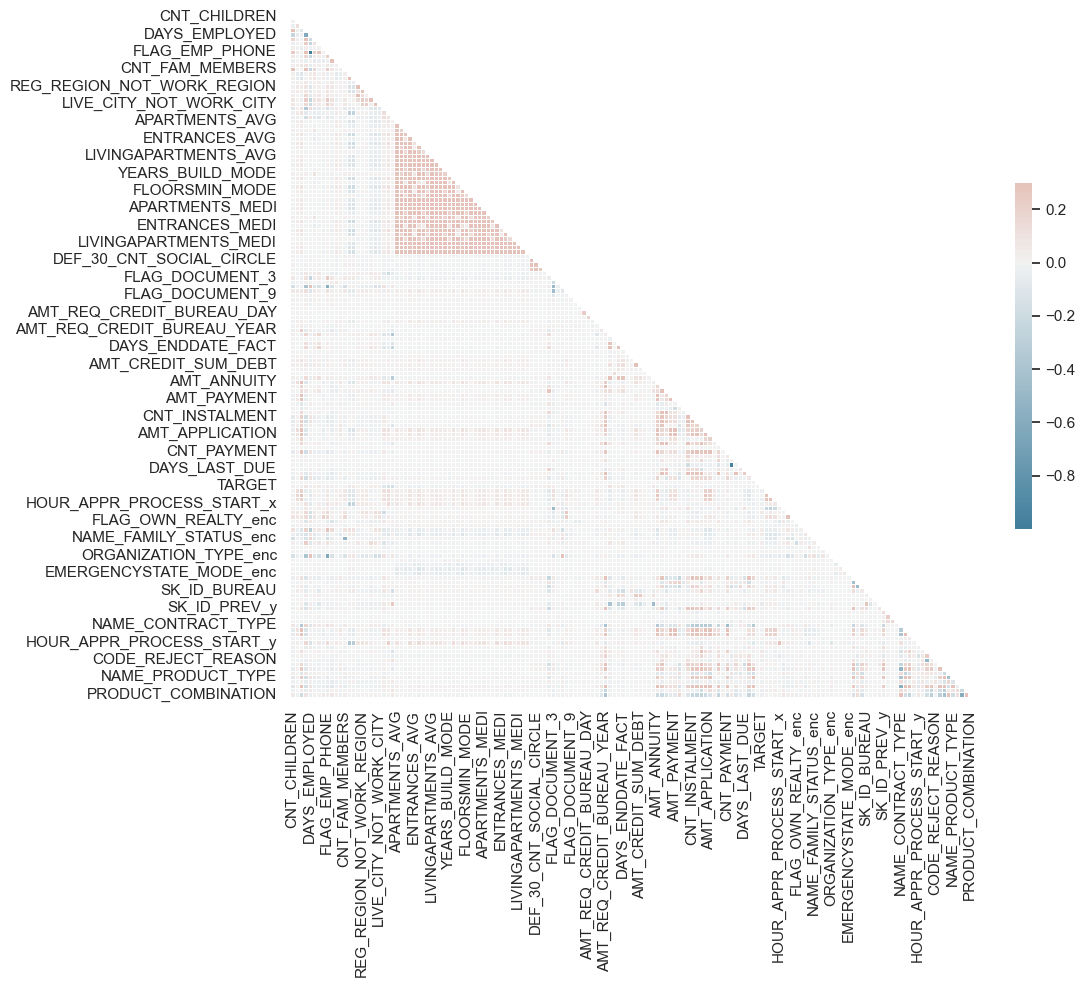

In [60]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = test.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [61]:
corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
CNT_CHILDREN,1.000000,0.011853,-0.049016,0.348898,-0.245085,0.187837,-0.030064,0.025905,0.246153,0.054640,...,-0.013499,-0.000637,-0.015626,-0.054862,0.042999,-0.082452,-0.014665,-0.089373,-0.014815,0.050881
AMT_INCOME_TOTAL,0.011853,1.000000,0.125369,0.026043,-0.057938,0.024439,0.012344,-0.018039,0.057810,-0.016355,...,0.004351,-0.001489,0.018295,0.019317,-0.003347,0.011549,-0.002161,0.028491,-0.005896,-0.013779
AMT_ANNUITY,-0.049016,0.125369,1.000000,-0.106063,-0.013294,-0.004108,-0.005038,-0.062678,0.012403,-0.051106,...,0.044810,-0.016371,0.163417,0.253614,-0.103595,0.235208,0.020598,0.373515,0.031860,-0.209600
DAYS_BIRTH,0.348898,0.026043,-0.106063,1.000000,-0.616944,0.331128,0.248270,0.032528,0.621005,0.170318,...,-0.013614,-0.043194,-0.057648,-0.098133,0.065785,-0.168915,-0.055609,-0.169640,-0.064931,0.087613
DAYS_EMPLOYED,-0.245085,-0.057938,-0.013294,-0.616944,1.000000,-0.206117,-0.263800,-0.019548,-0.999788,-0.232659,...,0.005353,0.026924,0.016618,0.040267,-0.018948,0.094557,0.042068,0.090079,0.057335,-0.034553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAME_PRODUCT_TYPE,-0.082452,0.011549,0.235208,-0.168915,0.094557,-0.073806,-0.052066,-0.022912,-0.095381,-0.023629,...,-0.016016,-0.076888,0.222431,0.379274,-0.424289,1.000000,-0.120706,0.373294,0.086829,-0.187794
CHANNEL_TYPE,-0.014665,-0.002161,0.020598,-0.055609,0.042068,-0.019505,-0.015631,-0.022267,-0.042460,-0.067800,...,0.020771,0.094235,-0.043717,-0.146315,0.181238,-0.120706,1.000000,-0.035663,0.125758,0.111862
NAME_SELLER_INDUSTRY,-0.089373,0.028491,0.373515,-0.169640,0.090079,-0.052869,-0.040116,-0.060166,-0.090517,-0.102706,...,0.270095,0.018820,0.435670,0.665173,-0.168360,0.373294,-0.035663,1.000000,-0.218325,-0.594880
NAME_YIELD_GROUP,-0.014815,-0.005896,0.031860,-0.064931,0.057335,-0.024516,-0.022954,-0.017412,-0.057899,0.017995,...,-0.254650,0.043697,-0.182248,-0.307594,0.053736,0.086829,0.125758,-0.218325,1.000000,0.440569


In [62]:
threshold = 0.9

# Identifier les couples corrélés
correlated_variables = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            variable_name = corr.columns[i]
            correlated_variables.add((variable_name, corr.index[j]))
print("Couples corrélés :")
for pair in correlated_variables:
    print(pair)

Couples corrélés :
('ENTRANCES_MEDI', 'ENTRANCES_AVG')
('FLOORSMIN_MEDI', 'FLOORSMIN_MODE')
('APARTMENTS_MODE', 'APARTMENTS_AVG')
('YEARS_BUILD_MODE', 'YEARS_BUILD_AVG')
('FLOORSMAX_MEDI', 'FLOORSMAX_MODE')
('FLAG_EMP_PHONE', 'DAYS_EMPLOYED')
('REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT')
('AMT_GOODS_PRICE_y', 'AMT_CREDIT_y')
('FLOORSMIN_MODE', 'FLOORSMIN_AVG')
('APARTMENTS_MEDI', 'APARTMENTS_AVG')
('AMT_PAYMENT', 'AMT_INSTALMENT')
('LIVINGAREA_MODE', 'LIVINGAREA_AVG')
('LIVINGAREA_MEDI', 'LIVINGAREA_AVG')
('FLOORSMAX_MODE', 'FLOORSMAX_AVG')
('LANDAREA_MODE', 'LANDAREA_AVG')
('CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT')
('ELEVATORS_MEDI', 'ELEVATORS_MODE')
('AMT_CREDIT_y', 'AMT_APPLICATION')
('AMT_GOODS_PRICE_y', 'AMT_APPLICATION')
('ELEVATORS_MODE', 'ELEVATORS_AVG')
('LANDAREA_MEDI', 'LANDAREA_AVG')
('LANDAREA_MEDI', 'LANDAREA_MODE')
('ENTRANCES_MEDI', 'ENTRANCES_MODE')
('YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE')
('FLOORSMIN_MEDI', 'FLOORSMIN_AVG')
('APARTMENTS_MEDI', 'APARTMENTS_

In [63]:
var_supprimer = set(pd.DataFrame(correlated_variables)[0])
len(var_supprimer)

31

In [64]:
data = test.drop(columns = var_supprimer)

In [65]:
data.shape

(247032, 124)

In [66]:
data

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,0.0,0.50,0.890042,0.254902,0.158657,0.480080,0.0,0.0,1.0,0.0,...,3,7,0,25,3,0,7,0,3,15
1,0.0,1.25,-0.134362,0.038824,0.610235,1.208765,0.0,0.0,1.0,0.0,...,0,7,1,7,3,0,4,4,4,7
2,0.0,-1.00,-0.454278,0.416471,0.046405,0.316335,17.0,1.0,1.0,0.0,...,0,7,0,19,3,0,6,2,4,14
3,0.0,-0.40,-0.578541,-0.686667,0.037051,-0.052988,0.0,0.0,0.0,0.0,...,0,7,2,27,2,2,4,4,1,8
4,0.0,-0.65,-0.159046,-0.118039,-0.083822,1.134661,0.0,1.0,1.0,0.0,...,0,7,2,27,3,0,4,4,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247027,0.0,-0.50,0.552174,0.348235,0.703962,-0.243426,0.0,0.0,0.0,1.0,...,0,7,2,19,3,0,4,2,3,13
247028,0.0,-0.50,-1.202945,143.737255,-0.523844,0.385657,0.0,0.0,1.0,0.0,...,0,1,0,5,2,0,5,4,1,3
247029,0.0,-0.05,0.117952,-2.601569,-0.407924,-0.727092,0.0,0.0,0.0,1.0,...,0,7,1,19,3,0,7,2,1,13
247030,0.0,0.15,0.539411,-1.372157,0.357850,0.953785,0.0,0.0,0.0,0.0,...,0,7,0,5,3,0,4,2,1,9


In [67]:
tmps_4

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,24.000000,3,15,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,4,10.000000,4,7,365243.0,-716.0,-1980.0,-1980.0,-527.0,1.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,2,4.000000,4,14,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
3,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,4,20.666667,1,8,365243.0,-344.0,-2056.0,-2056.0,365243.0,1.0
4,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,4,14.000000,3,9,365243.0,-339.0,-2341.0,-2341.0,-66.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247027,456247,0,0,112500.0,345510.0,17770.5,247500.0,0.022800,-11870,-399,...,2,7.750000,3,13,365243.0,-419.0,-2722.0,-2722.0,-321.0,0.0
247028,456249,0,0,112500.0,225000.0,22050.0,225000.0,0.022800,-24384,365243,...,4,12.000000,1,3,365243.0,-1495.0,-1165.0,-1165.0,-1156.0,0.0
247029,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,2,5.000000,1,13,365243.0,-1866.0,-2722.0,-2722.0,-1712.0,0.5
247030,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,2,15.000000,1,9,365243.0,-247.0,99.0,365243.0,365243.0,0.5


<AxesSubplot:>

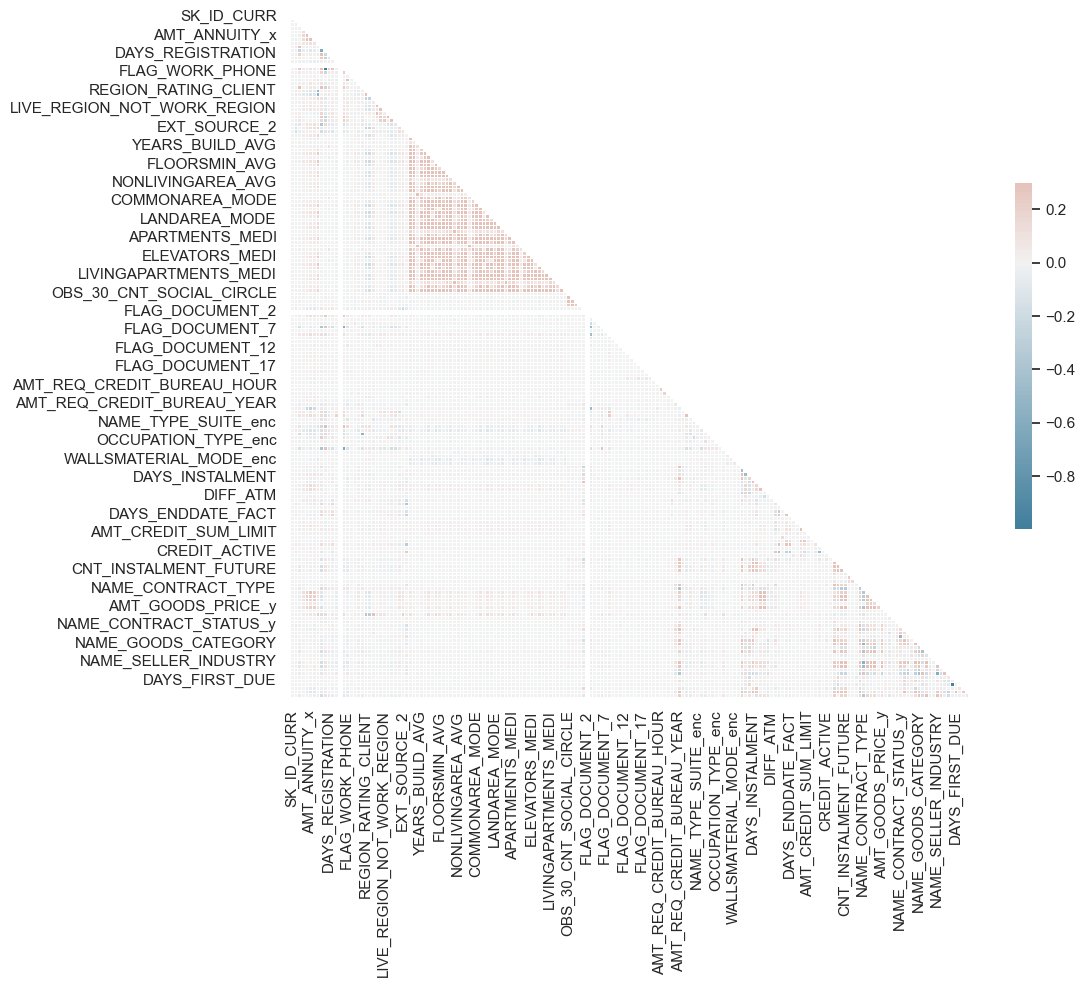

In [68]:

sns.set_theme(style="white")

# Compute the correlation matrix
corr = tmps_4.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [69]:
threshold = 0.80

# Identifier les couples corrélés
correlated_variables = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            variable_name = corr.columns[i]
            correlated_variables.add((variable_name, corr.index[j]))
print("Couples corrélés :")
for pair in correlated_variables:
    print(pair)

Couples corrélés :
('APARTMENTS_MODE', 'APARTMENTS_AVG')
('FLOORSMAX_MEDI', 'FLOORSMAX_MODE')
('LIVINGAREA_MEDI', 'LIVINGAREA_AVG')
('LANDAREA_MODE', 'LANDAREA_AVG')
('TOTALAREA_MODE', 'APARTMENTS_MEDI')
('CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT')
('LIVINGAREA_MEDI', 'ELEVATORS_MODE')
('NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE')
('AMT_CREDIT_y', 'AMT_APPLICATION')
('ELEVATORS_AVG', 'APARTMENTS_AVG')
('NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE')
('LANDAREA_MEDI', 'LANDAREA_AVG')
('LANDAREA_MEDI', 'LANDAREA_MODE')
('APARTMENTS_MEDI', 'ELEVATORS_AVG')
('NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG')
('LIVINGAREA_MEDI', 'APARTMENTS_MEDI')
('YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE')
('FLOORSMIN_MEDI', 'FLOORSMIN_AVG')
('LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY')
('BASEMENTAREA_MODE', 'BASEMENTAREA_AVG')
('TOTALAREA_MODE', 'APARTMENTS_MODE')
('BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE')
('NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG')
('ENTRANCES_MODE', 'ENTRANCES

In [70]:
var_supprimer = set(pd.DataFrame(correlated_variables)[0])

In [71]:
data2 = data

In [72]:
data2 = tmps_4.drop(columns = var_supprimer)

In [73]:
data2.to_csv(r"C:\Users\lcatteau\Desktop\data2p7")